### 008 DataMaker

This is a notebook to make a data sets for the 008 relationship plots for the tutorial and the in-class exercise. It makes:

#### two related numeric variables

* linear relationship for tutorial
* non-linear " " "
* linear for exercise
* non-lin for exercise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data for tutorial

Specity whatever filenames you want:

In [ ]:
fname1 = "008TutorialDataFile1.csv"
fname2 = "008TutorialDataFile2.csv"

#### Make some linearly related data.

Define size of data.

In [3]:
n = 100 # number of observations
nv = 2  # number of variables
xmin = 0 # minimum x value
xmax = 100

Make the numerical data (i.e. the measurements).

In [24]:
x = np.linspace(xmin, xmax, n)
x = x[:, np.newaxis] # makes a column vector - sheesh
m = 4.2
b = 5
noysAmp = 1
noys = np.random.randn(n, 1)
y = b + m*x + noysAmp*noys 

In [25]:

myData = np.hstack((x,y))
np.shape(myData)

(100, 2)

Now make the numpy array into a pandas data frame:

<AxesSubplot:xlabel='X'>

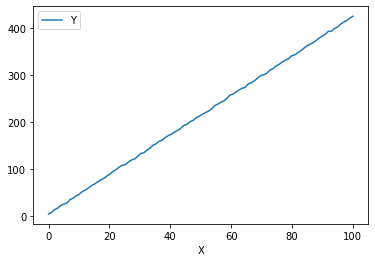

In [28]:
myDataFr = pd.DataFrame(myData, columns=["X", "Y"])
myDataFr.plot(x="X", y="Y")

Save the data frame to a .csv (comma separated values) file:

In [ ]:
myDataFr.to_csv(fname, index=False)

#### Data for in-class exercise

In [ ]:
fname = "007ExerciseFile.csv"

These data will have 4 groups instead of 2 for giggles.

Define size of data.

In [ ]:
n = 42 # number of observations
nv = 2  # number of variables

Make the numerical data (i.e. the measurements).

In [ ]:
myDataA = 10 + 1.5*np.random.randn(n, 1)
myDataB = 5 + 1.2*np.random.randn(n, 1) # give vars different means and sds
myDataC = 1 + 0.2*np.random.randn(n, 1)
myDataD = 2 + 0.5*np.random.randn(n, 1)

Make the group (condition, whatever) labels.

In [ ]:
a = np.array(["st_alpha"])
a = np.tile(a, (n,1))
b = np.array(["st_beta"])
b = np.tile(b, (n,1))
c = np.array(["st_gamma"])
c = np.tile(c, (n,1))
d = np.array(["st_delta"])
d = np.tile(d, (n,1))

Concatenate the data into "tidy" form.

In [ ]:
measurements = np.vstack((myDataA,myDataB,myDataC,myDataD))
groups = np.vstack((a,b,c,d))
myData = np.hstack((groups, measurements))

Look at what we're going to put in the file:

In [ ]:
np.shape(myData)

Now make the numpy array into a pandas data frame:

In [ ]:
myDataFr = pd.DataFrame(myData, columns=["Strain", "Mutation_rate"])

Save the data frame to a .csv (comma separated values) file:

In [ ]:
myDataFr.to_csv(fname, index=False)

### Now check that the file is okay

In [ ]:
mydf = pd.read_csv(fname)

In [ ]:
mydf.groupby("Strain").boxplot()

In [ ]:
sns.displot(mydf, x="Mutation_rate", hue="Strain", kind="kde", fill=True, alpha=0.2)

In [ ]:
sns.boxplot(data=mydf, x="Strain", y="Mutation_rate")
sns.stripplot(data=mydf, x="Strain", y="Mutation_rate", alpha = 0.42)